
# 網頁連結器 對 網頁伺服器發出 請求(Requests)
# 網頁伺服器 對 網頁連結器產生 回應(Response)


# Requests: HTTP for Human 網路資源擷取模組 
# http://docs.python-requests.org/en/master/

# 用 Get 請求網頁內容 

In [1]:
import requests
res = requests.get("http://www.gov.taipei/")
type(res) #回傳Response物件

requests.models.Response

HTTP狀態碼有數十個，按照百位數字分成五大類。
1xx(資訊)、2xx(成功)、3xx(重新導向)、4xx(用戶端錯誤)、5xx(伺服器端錯誤)

In [2]:
res.status_code

200

In [3]:
res.headers # 網頁回應標頭(headers)

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Content-Length': '66343', 'Content-Type': 'text/HTML; charset=utf-8; Charset=utf-8', 'Expires': 'Thu, 06 Apr 2017 17:33:57 GMT', 'Server': 'Microsoft-IIS/7.5', 'Set-Cookie': 'ASPSESSIONIDACSSQSQQ=FNHHABLCAEFNMLMMJEBAMKLD; path=/, ccsession=201704070134576e1319ac0d007dd1; path=/; domain=www.gov.taipei, ccguid=201704070134576e1319ac0d007dd1; path=/; domain=www.gov.taipei; expires=Wed, 31 Dec 2025 15:59:59 GMT', 'X-Powered-By': 'ASP.NET', 'Date': 'Thu, 06 Apr 2017 17:34:57 GMT'}

In [4]:
res.encoding # 網頁編碼

'utf-8'

In [5]:
res.text # 網頁內容

'\r\n\r\n<?xml version="1.0"  encoding="utf-8" ?>\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<!-- pageCache.asp fall thru! -->\r\n<html xml:lang="zh-TW" lang="zh-TW" xmlns:hyweb="urn:gip-hyweb-com" xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n<meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7"/>\r\n<meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7"/>\r\n<meta http-equiv="X-Frame-Options" content="SAMEORIGIN"/>\r\n<meta HTTP-EQUIV="PRAGMA" CONTENT="NO-CACHE"/>\r\n<meta HTTP-EQUIV="EXPIRES" CONTENT="0"/>\r\n<meta HTTP-EQUIV="CACHE-CONTROL" CONTENT="NO-CACHE"/>\r\n<meta HTTP-EQUIV="expires" CONTENT="METADATETIME"/>\r\n<title>臺北市政府</title>\r\n<meta property="og:title" content="臺北市政府_首頁">\r\n<meta property="og:Description" content="提供臺北市政府的新聞訊息">\r\n<meta name="ROBOTS" content="NOARCHIVE">\r\n<meta name="DC.Title" c

In [6]:
#在網址傳遞參數
query = input("請輸入查詢項目：")
payload = {"qt":"dismax", "ro":"true", "d": 0, "mp":100001 , "q": query}
res = requests.get("http://wisearch.taipei.gov.tw/wise/s.jsp", params=payload)
print(res.url)
# http://wisearch.taipei.gov.tw/wise/s.jsp?qt=dismax&ro=true&d=0&mp=100001&q=%E6%8D%B7%E9%81%8B

請輸入查詢項目：捷運
http://wisearch.taipei.gov.tw/wise/s.jsp?qt=dismax&ro=true&d=0&mp=100001&q=%E6%8D%B7%E9%81%8B


請輸入查詢項目：耳機


'<!DOCTYPE html>\n<html lang="zh-Hant-tw" id="Stencil">\n<head>\n<link rel="canonical" href="https://buy.yahoo.com.tw" />\n<meta http-equiv="content-type" content="text/html" charset="utf-8">\n<meta http-equiv="expires" content="-1">\n<meta name="description" content="Yahoo!奇摩購物中心,提供40萬項以上商品讓您隨時享受購物服務,免運費,享有七天鑑賞期,是網路購物第一選擇,我們有300位以上專業團隊為您提供服務"/>\n<meta name="keywords" content="Yahoo!奇摩購物中心,購物,週年慶,百貨週年慶,會招,每日好康,福利品,特價,下殺,分期,0利率,無息,紅利折抵,超商取貨,快速到貨,限量"/>\n<meta name="application-name" content="Yahoo!奇摩購物中心">\n<meta name="msapplication-TileColor" content="#7B0099">\n<meta name="msapplication-TileImage" content="https://s.yimg.com/f/i/tw/monday/ymp/icon_pin_shopping_130103.png">\n<title>搜尋 耳機 結果- Yahoo!奇摩購物中心</title>       \n<!-- facebook applinks -->\n<meta property="al:android:url" content="yecshopping://tw.search.buy.yahoo.com/search/shopping/product?p=%E8%80%B3%E6%A9%9F&property=shopping&sub_property=shopping&srch=product">\n<meta property="al:android:package" content="com.yahoo.mobile.c
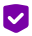

In [7]:
from urllib.parse import quote
query = input("請輸入查詢項目：")
url = "https://tw.search.buy.yahoo.com/search/shopping/product?p=" + quote(query)
# 範例：https://tw.search.buy.yahoo.com/search/shopping/product?p=%E8%80%B3%E6%A9%9F
res = requests.get(url)
res.text

In [8]:
import requests
#預設是None，永久等待
res = requests.get("http://edition.cnn.com/", timeout=(0.1,1))# (連接的等待時間，等待第一個byte時間)
res.text

ConnectionError: HTTPConnectionPool(host='edition.cnn.com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x10ec9e630>: Failed to establish a new connection: [Errno 65] No route to host',))

In [9]:
#是否禁用導向(Redirect)
import requests
res = requests.get('http://httpbin.org/redirect/6', allow_redirects=True)
res.history

[<Response [302]>,
 <Response [302]>,
 <Response [302]>,
 <Response [302]>,
 <Response [302]>,
 <Response [302]>]

In [10]:
#使用者身份認證資料
import requests
res = requests.get('http://httpbin.org/basic-auth/user/passwd', auth=('user', 'passwd'))
res.text

'{\n  "authenticated": true, \n  "user": "user"\n}\n'

In [11]:
#JSON回應內容
import requests
res = requests.get('https://api.github.com/events')
res.json()

[{'actor': {'avatar_url': 'https://avatars.githubusercontent.com/u/26230763?',
   'display_login': 'npmdoc-user',
   'gravatar_id': '',
   'id': 26230763,
   'login': 'npmdoc-user',
   'url': 'https://api.github.com/users/npmdoc-user'},
  'created_at': '2017-04-06T17:36:08Z',
  'id': '5640955000',
  'org': {'avatar_url': 'https://avatars.githubusercontent.com/u/26134505?',
   'gravatar_id': '',
   'id': 26134505,
   'login': 'npmdoc',
   'url': 'https://api.github.com/orgs/npmdoc'},
  'payload': {'description': None,
   'master_branch': 'alpha',
   'pusher_type': 'user',
   'ref': 'beta',
   'ref_type': 'branch'},
  'public': True,
  'repo': {'id': 87189970,
   'name': 'npmdoc/node-npmdoc-favicons-webpack-plugin',
   'url': 'https://api.github.com/repos/npmdoc/node-npmdoc-favicons-webpack-plugin'},
  'type': 'CreateEvent'},
 {'actor': {'avatar_url': 'https://avatars.githubusercontent.com/u/21377421?',
   'display_login': 'jikker',
   'gravatar_id': '',
   'id': 21377421,
   'login': 'j

In [12]:
#自訂請求的標頭
import requests
url = "https://api.github.com/some/endpoint"
headers = {"User-Agent": "Mozilla/52.0.2 Chrome/57.0.2987.133 Safari/11602.4.8.0.1"}
res = requests.get(url, headers=headers)
res.text

'{\n  "message": "Not Found",\n  "documentation_url": "https://developer.github.com/v3"\n}\n'

# 用 Post 請求網頁內容 

In [13]:
import requests
# 將資料建成字典
thsrc = {"StartStation": "977abb69-413a-4ccf-a109-0272c24fd490",\
"EndStation": "3301e395-46b8-47aa-aa37-139e15708779",\
"SearchDate": "2017/04/07",\
"SearchTime": "16:00",\
"SearchWay": "DepartureInMandarin"}
res = requests.post("https://www.thsrc.com.tw/tw/TimeTable/SearchResult", data = thsrc)
res.text

'\r\n\r\n<!DOCTYPE html>\r\n<html lang="zh-tw">\r\n\r\n\r\n\r\n<meta charset="utf-8" />\r\n<link rel="shortcut icon" href="/Content/favicon/favicon.ico" />\r\n<link rel="apple-touch-icon-precomposed" href="/Content/favicon/57_57.png" sizes="57x57" />\r\n<link rel="apple-touch-icon-precomposed" href="/Content/favicon/72_72.png" sizes="72x72" />\r\n<link rel="apple-touch-icon-precomposed" href="/Content/favicon/76_76.png" sizes="76x76" />\r\n<link rel="apple-touch-icon-precomposed" href="/Content/favicon/114_114.png" sizes="114x114" />\r\n<link rel="apple-touch-icon-precomposed" href="/Content/favicon/120_120.png" sizes="120x120" />\r\n<link rel="apple-touch-icon-precomposed" href="/Content/favicon/144_144.png" sizes="144x144" />\r\n<link rel="apple-touch-icon-precomposed" href="/Content/favicon/152_152.png" sizes="152x152" />\r\n<!--<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no, minimum-scale=1.0, maximum-scale=1.0" />-->\r\n<meta name="keywords"

# Beautiful Soup: HTML 網頁剖析模組
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [1]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""
from bs4 import BeautifulSoup 
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify()) #BeautifulSoup4解析後的物件，安照標準縮排格式的結構輸出

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [2]:
#Soup物件的內容串列
soup.contents

['\n', <html><head><title>The Dormouse's story</title></head>
 <body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>]

In [3]:
# 所有標籤內的文字
soup.text

"\nThe Dormouse's story\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [6]:
#只把 html 的部分取出來
soup.select("html")[0]

[<html><head><title>The Dormouse's story</title></head>
 <body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>]

In [18]:
# <title>標籤開始到結束
soup.title

<title>The Dormouse's story</title>

In [19]:
#<title>標籤的內容
soup.title.string

"The Dormouse's story"

In [20]:
# <title>上層標籤的名字
soup.title.parent.name

'head'

In [21]:
# <p>標籤開始到結束
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [22]:
# class屬性的值
soup.p["class"]

['title']

In [23]:
# id屬性值是link3的<a>標籤
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [24]:
#找出所有<a>標籤，並取出連結
for link in soup.find_all("a"):
    print(link.get("href"))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie
